# Analyse exploratoire

Ce Notebook permet de réaliser l'**analyse exploratoire** des données **CREDIT**. 

Un **pre-traitement** des données est aussi appliqué pour aider à l'analyse exploiratoire.

## Avant-propos 

Les données de la CEMP disponibles pour ce projet sont constituées de la table **`"crédits"`**.  

Les variables à prédire sont: 

- <font color = 'red'> **task1** </font> : Le <font color = 'blue'> **nombre de dossiers qui arrivent au backOffice** </font> par jour ou par semaine. Pour cela, on calcule le nombre de `CODOSB` par jour ou par semaine en fonction de la date donnée par `DATEDI`. Les besoins du métier sont à la semaine (ils ont surtout besoin de connaître le nombre de dossiers qui arrivent par semaine.    

- <font color = 'red'> **task2** </font> :  Le <font color = 'blue'> **délai** </font> entre la date de l'accord du client déterminé par la signature du dossier (varible `DTINS`) et la date d'arrivée du crédit au backOffice `DATEDI`. En effet, lorsq'un client veut contracter un crédit, il monte un dossier. Lorsque ce dossier est conforme, il est accepté et le client signe le dossier. Une fois le dossier signé par le client, il arrive au backOffice. Ainsi, la réponse se calcule comme suit: `DELAI` = `DATEDI` - `DTINS` 

______________
Voici les données choisies :
- Données crédits :

| Libellé    | Définition                                  |Variable retenue (V1) |Quanti (1)/Quali(0)/date(d) |
|------------|---------------------------------------------|----------------------|--------------------| 
| `COETB`    | Code Etablissement                          |                      |0                   |     
| `LIETB`    | Libellé Etablissement                       |X                     |0                   |       
| `CODOSB`   | Identifiant dossier bancaire                |X                     |0                   |
| `COCO`     | Identifiant contrat                         |X                     |0                   |
| `COPRO`    | Code produit local                          |                      |0                   |
| `LIPRLG`   | Libellé code produit local                  |                      |0                   |
| `COPROG`   | Identifiant produit groupe                  |X                     |0                   |
| `LIPRO`    | Libellé produit groupe                      |                      |0                   |
| `COOBJ`    | Code objet prêt                             |X                     |0                   |
| `LOBJ`     | Libellé du code objet prêt                  |                      |0                   |
| `MEDOS`    | Montant nominal du dossier                  |X                     |1                   |
| `TAINT`    | Taux intérêt                                |X                     |1                   |
| `TITEGI`   | TEG Initial prêt                            |X                     |1                   |
| `QLDDOS`   | Durée du prêt                               |X                     |1                   |
| `NBASSGPE` | Nbre Assurance Groupe                       |X                     |1                   |
| `NBASSEXT` | Nbre Assurance Externe                      |X                     |1                   |
| `NBGAR`    | Nbre de garantie(s)                         |X                     |1                   |
| `TOPPSC`   | Top prescription (O/N)                      |X                     |0                   | 
| `COFAAP`   | Code famille apporteur affaire              |                      |0                   | 
| `LIBLGG`   | Libellé long du CBO prescripteur            |                      |0                   | 
| `COPOST`   | Code postal du bien financé                 |X                     |0                   | 
| `CONSCE`   | Nbre de scénarios (Accord Banque à traiter) |X                     |1                   | 
| `DDDOSP`   | Date instruction à traiter                  |X                     |d                   | 
| `DTINS`    | Date instruction traitée                    |X                     |d                   | 
| `COEMINS`  | Identifiant employé instruction             |X                     |0                   | 
| `DATDEC`   | Date accord banque à traiter                |X                     |d                   | 
| `DTDEC`    | Date accord banque traitée                  |X                     |d                   | 
| `COEMDEC`  | Identifiant employé décision                |X                     |0                   | 
| `DATEDI`   | Date edition à traiter                      |X                     |d                   | 
| `DTEDI`    | Date édition traitée                        |X                     |d                   | 
| `COEMEDI`  | Identifiant employé édition                 |X                     |0                   | 
| `DELINS`   | Nbre jrs Instruction                        |X                     |1                   | 
| `DELDEC`   | Nbre jrs Décision                           |X                     |1                   | 
| `DELEDI`   | Nbre Jrs Edition                            |X                     |1                   | 
|`TOP_EDITION_BACK_OFFICE`| Crédit ayant transféré par le BackOffce |X            |0                   |
|`CODE_INDIC_PRM_ACCS`| Client primo accédant              |             |                    |

In [1]:
# Importation des packages nécessaires
# ---------------------------------------
# Importation des librairies python
import pandas as pd 
import numpy as np
import os

# Importation des librairies du répertoire courant
from set_path import PATH,PATH_DATA,PATH_UTILS,PATH_PLOTS

# Importation des librairies du répertoire utilities
os.chdir(PATH_UTILS) # on se place dans utilities
from set_global import *
import data_prep_general as dpg
import data_viz as dv

print(">>> Pour savoir utiliser la fonction 'fct' de package 'lib' exécuter : help(lib.fct)")

>>> Pour savoir utiliser la fonction 'fct' de package 'lib' exécuter : help(lib.fct)


## Premier pre-processing

In [41]:
# Récupération des jeux de données
# ------------------------------------
#--- dataset CEMP
credits_CEMP = pd.read_csv(PATH_DATA + "/CEMP - Données CREDITS.csv", encoding='utf8', sep=';')
credits = credits_CEMP.copy()

print("taille credits_CEMP: {} x {}".format(credits_CEMP.shape[0],credits_CEMP.shape[1]))

taille credits_CEMP: 61014 x 36


In [42]:
# Pré-processing général de certaines variables (cas particuliers)
# ------------------------------------
credits = dpg.special_treatment(credits)

In [43]:
print("taille credits: {} x {}".format(credits.shape[0],credits.shape[1]))

taille credits: 42659 x 28


## Variables quantitatives

In [44]:
# types des variables quantitatives 
# ------------------------------------
credits[VAR_QUANTI_CREDIT].dtypes

MEDOS       float64
TAINT       float64
TITEGI      float64
QLDDOS        int64
NBASSGPE    float64
NBASSEXT    float64
NBGAR       float64
DELINS      float64
DELDEC      float64
DELEDI      float64
CONSCE      float64
dtype: object

### Variables nulles &  manquantes

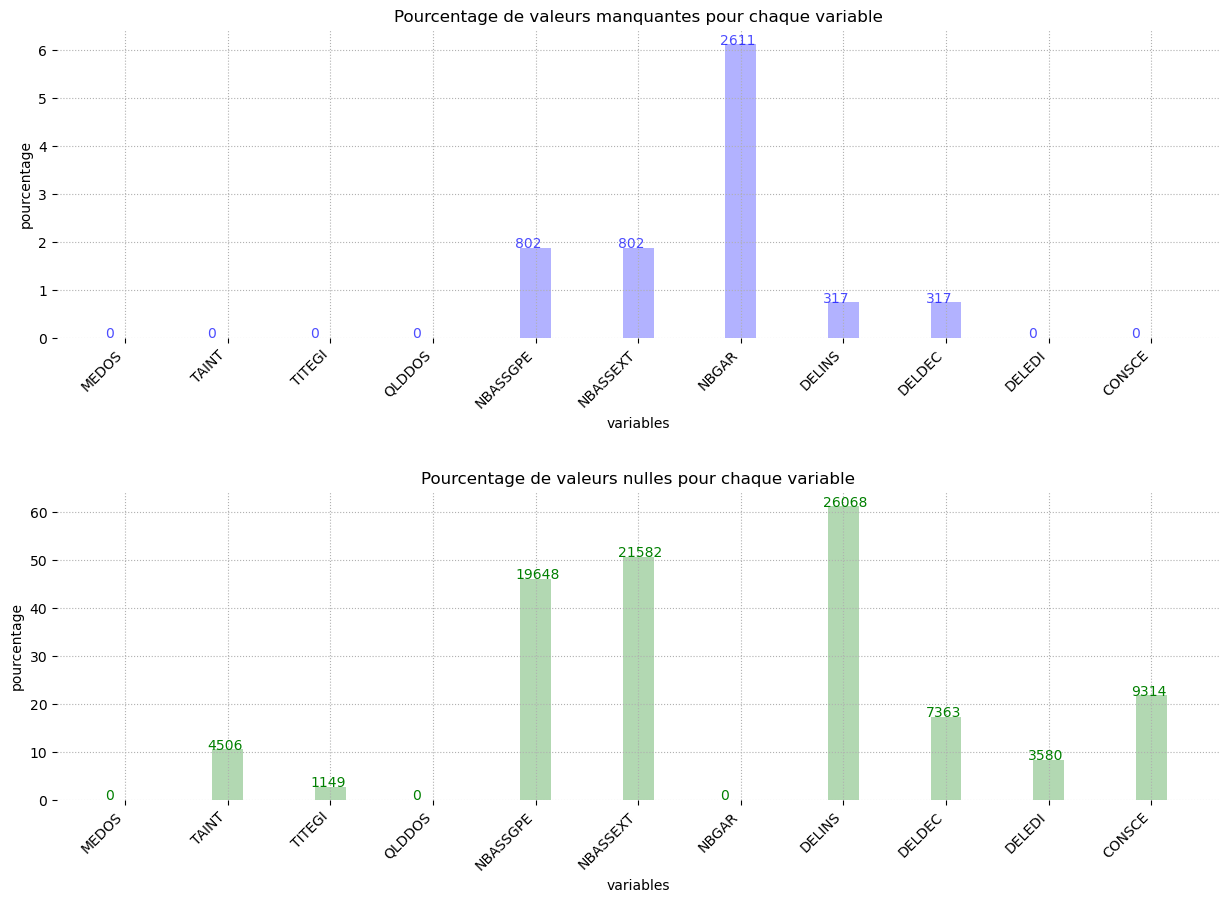

In [45]:
# Calcul des données manquantes & données nulles
# -------------------------------------------
dv.plot_na_null(credits,VAR_QUANTI_CREDIT,fig_size=[15,10],plot_null=True)

=> *Les zéros sont ils des données manquantes ou des vrais 0 ?*
    
**Observations:**
    
- La variable `CONSCE` a originellement 50% de donnés manquantes. Cependant, d'après Bertrand, il s'agit  du nombre d'intéractions entre l'agence et le back Office lorsqu'un dossier n'est pas valide du premier coup. On a donc mis les valeurs NaN à 0 par défaut. 
- Les variables `DELINS`, `DELDEC` et `DELEDI` sont des nombres de jours. Nous allons regarder par la suite si ces variables ont des 0 aux même endroit ce qui pourrait indiquer que ces 0 correspondent à des données manquantes.
- Les variables `NBASSGPE` et `NBASSEXT` sont ne nombre d'assurance groupe et le nomdre d'assurance Externe. Il se pourrait que ces 0 soient de vrais 0 (quand un client ne possède aucune assurance). Un client possède soit une assurance externe, soit une assurance de groupe. 

In [46]:
# Regarder si 'DELINS','DELDEC','DELEDI' ont des 0 au mêmes endroits
# ----------------------------------------------------
var = ['DELINS','DELDEC','DELEDI'] 
df_3_var = credits[var]
#ajouter une colonne qui contient la somme des 3 premières colonnes :
#(les NaN ne sont pas compris dans la somme)
df_3_var['sum'] =  df_3_var[var].sum(axis = 1) 

#nombre de lignes de df_3_var contenant au moins 1 zéro
n_1Zero = len(df_3_var.iloc[np.unique(np.where(df_3_var[var]==0.0)[0])])

#nombre de lignes de df_3_var où toutes les valeurs sont nulles
n_allZero = len(df_3_var[df_3_var['sum'] == 0])

print("{} valeurs pour les variables 'DELINS','DELDEC','DELEDI' contienent au moins 1 zéro sur {} valeurs au total.".format(str(n_1Zero),str(len(df_3_var))))
print("=> soit {} %".format(str(round(n_1Zero/len(df_3_var)*100,3))))      
      
print("{} valeurs pour les variables 'DELINS','DELDEC','DELEDI' sont toutes nulles sur {} valeurs au total.".format(str(n_allZero),str(len(df_3_var))))
print("=> soit {} %".format(str(round(n_allZero/len(df_3_var)*100,3))))      

29859 valeurs pour les variables 'DELINS','DELDEC','DELEDI' contienent au moins 1 zéro sur 42659 valeurs au total.
=> soit 69.995 %
795 valeurs pour les variables 'DELINS','DELDEC','DELEDI' sont toutes nulles sur 42659 valeurs au total.
=> soit 1.864 %


**Observations:**
 
- Seulement 5% des variables `DELINS`,`DELDEC`,`DELEDI` sont nulles au même endroit. 

### Histogrammes & Boxplots

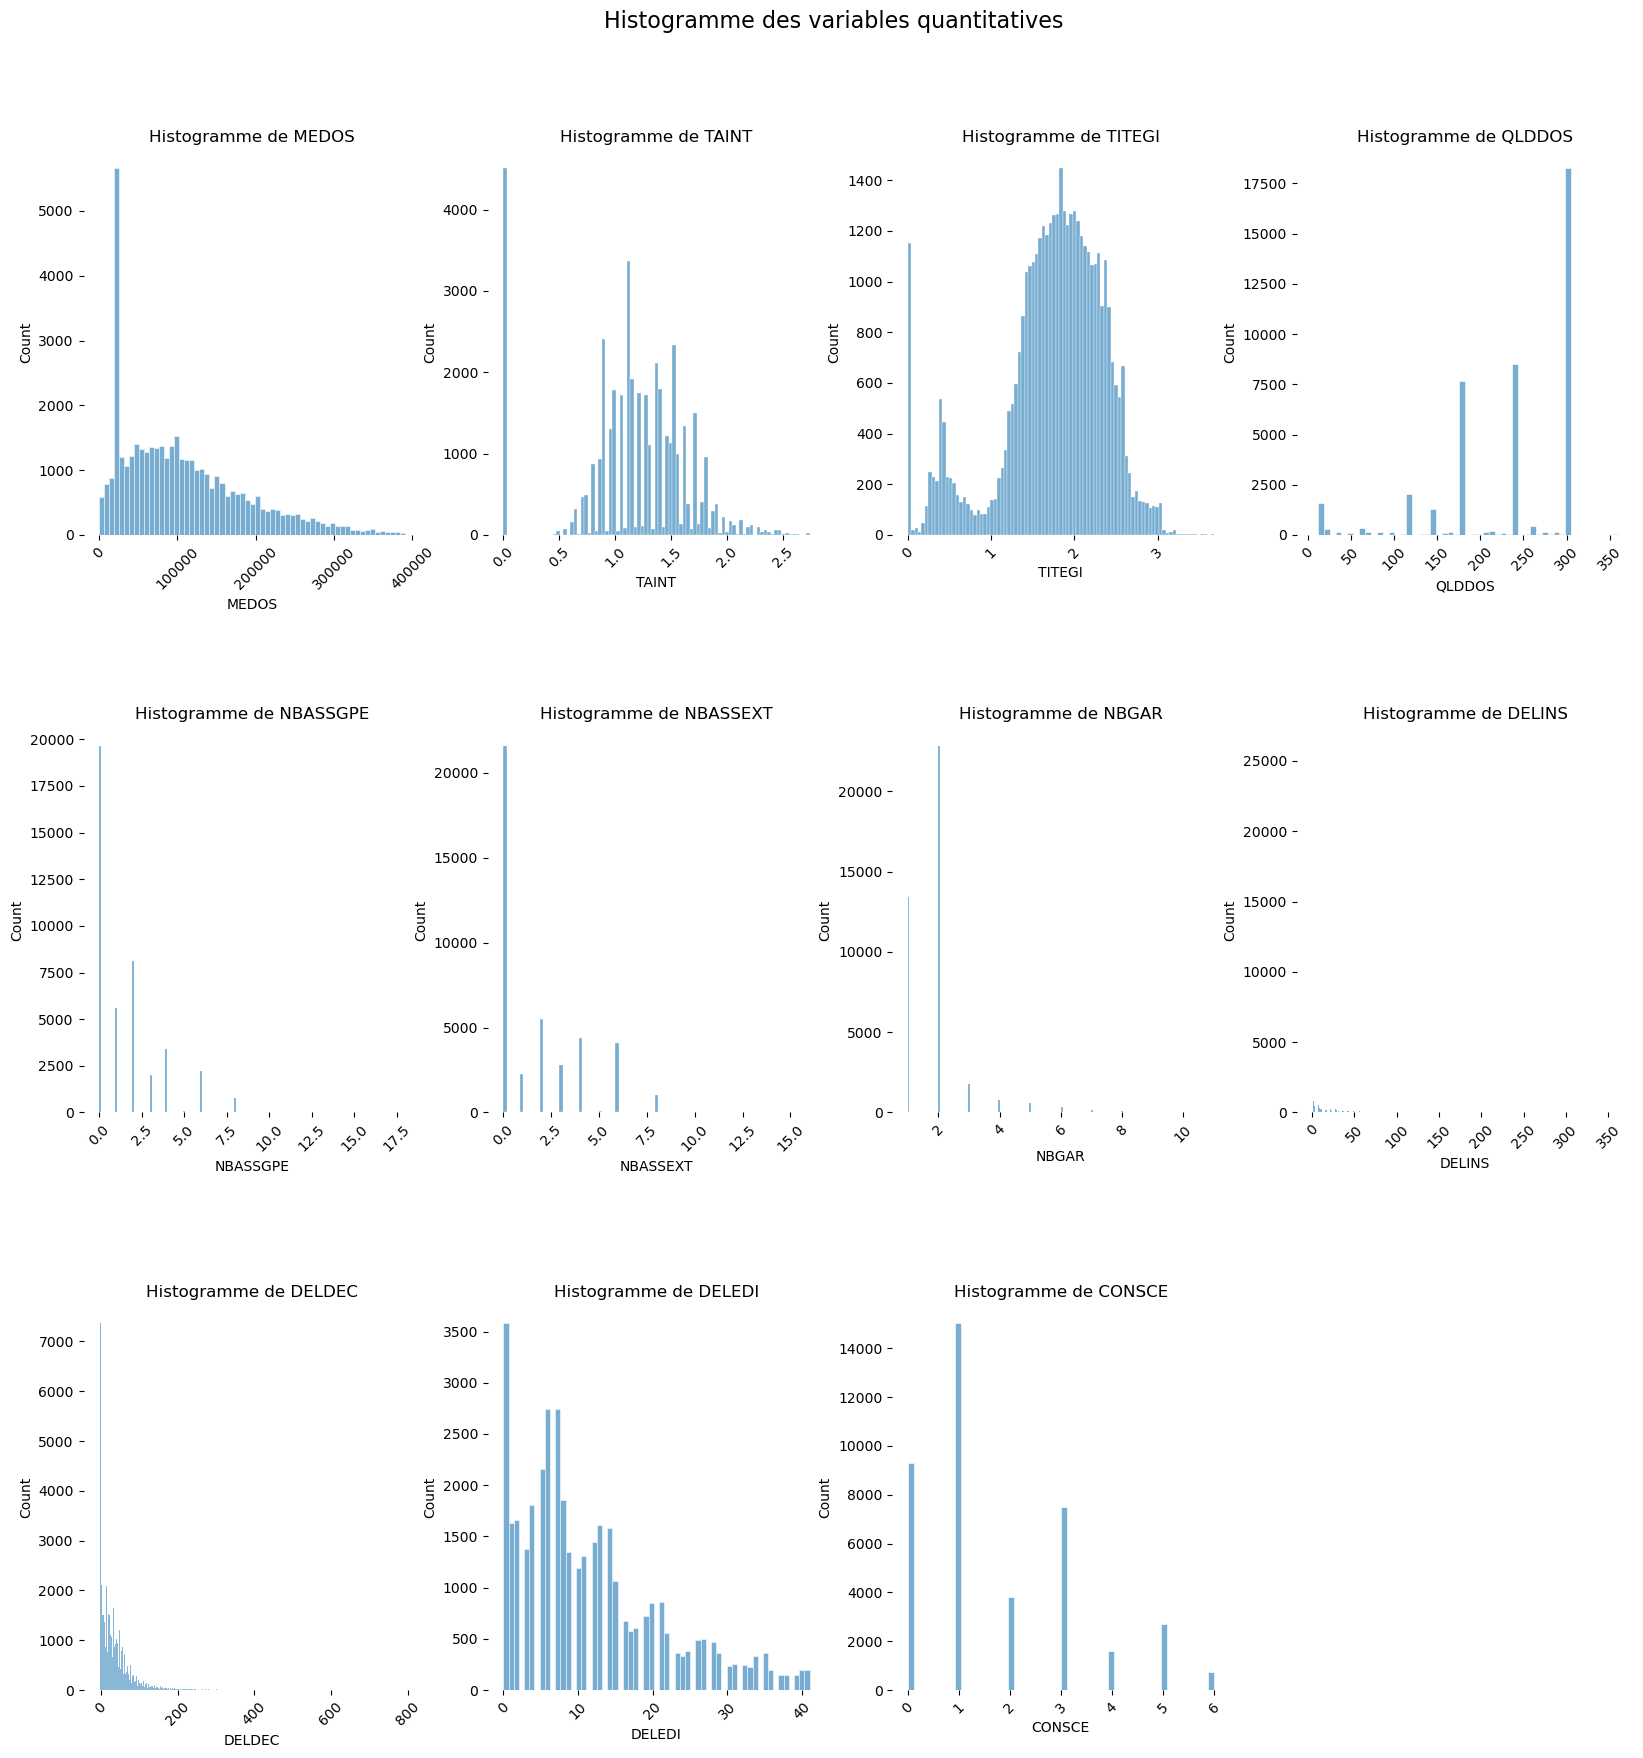

In [47]:
# Histogrammes de toutes les variables quantitatives
# --------------------------------------------------
dv.plot_hist_box(credits,VAR_QUANTI_CREDIT,type_plot='hist',layout=[3,4])

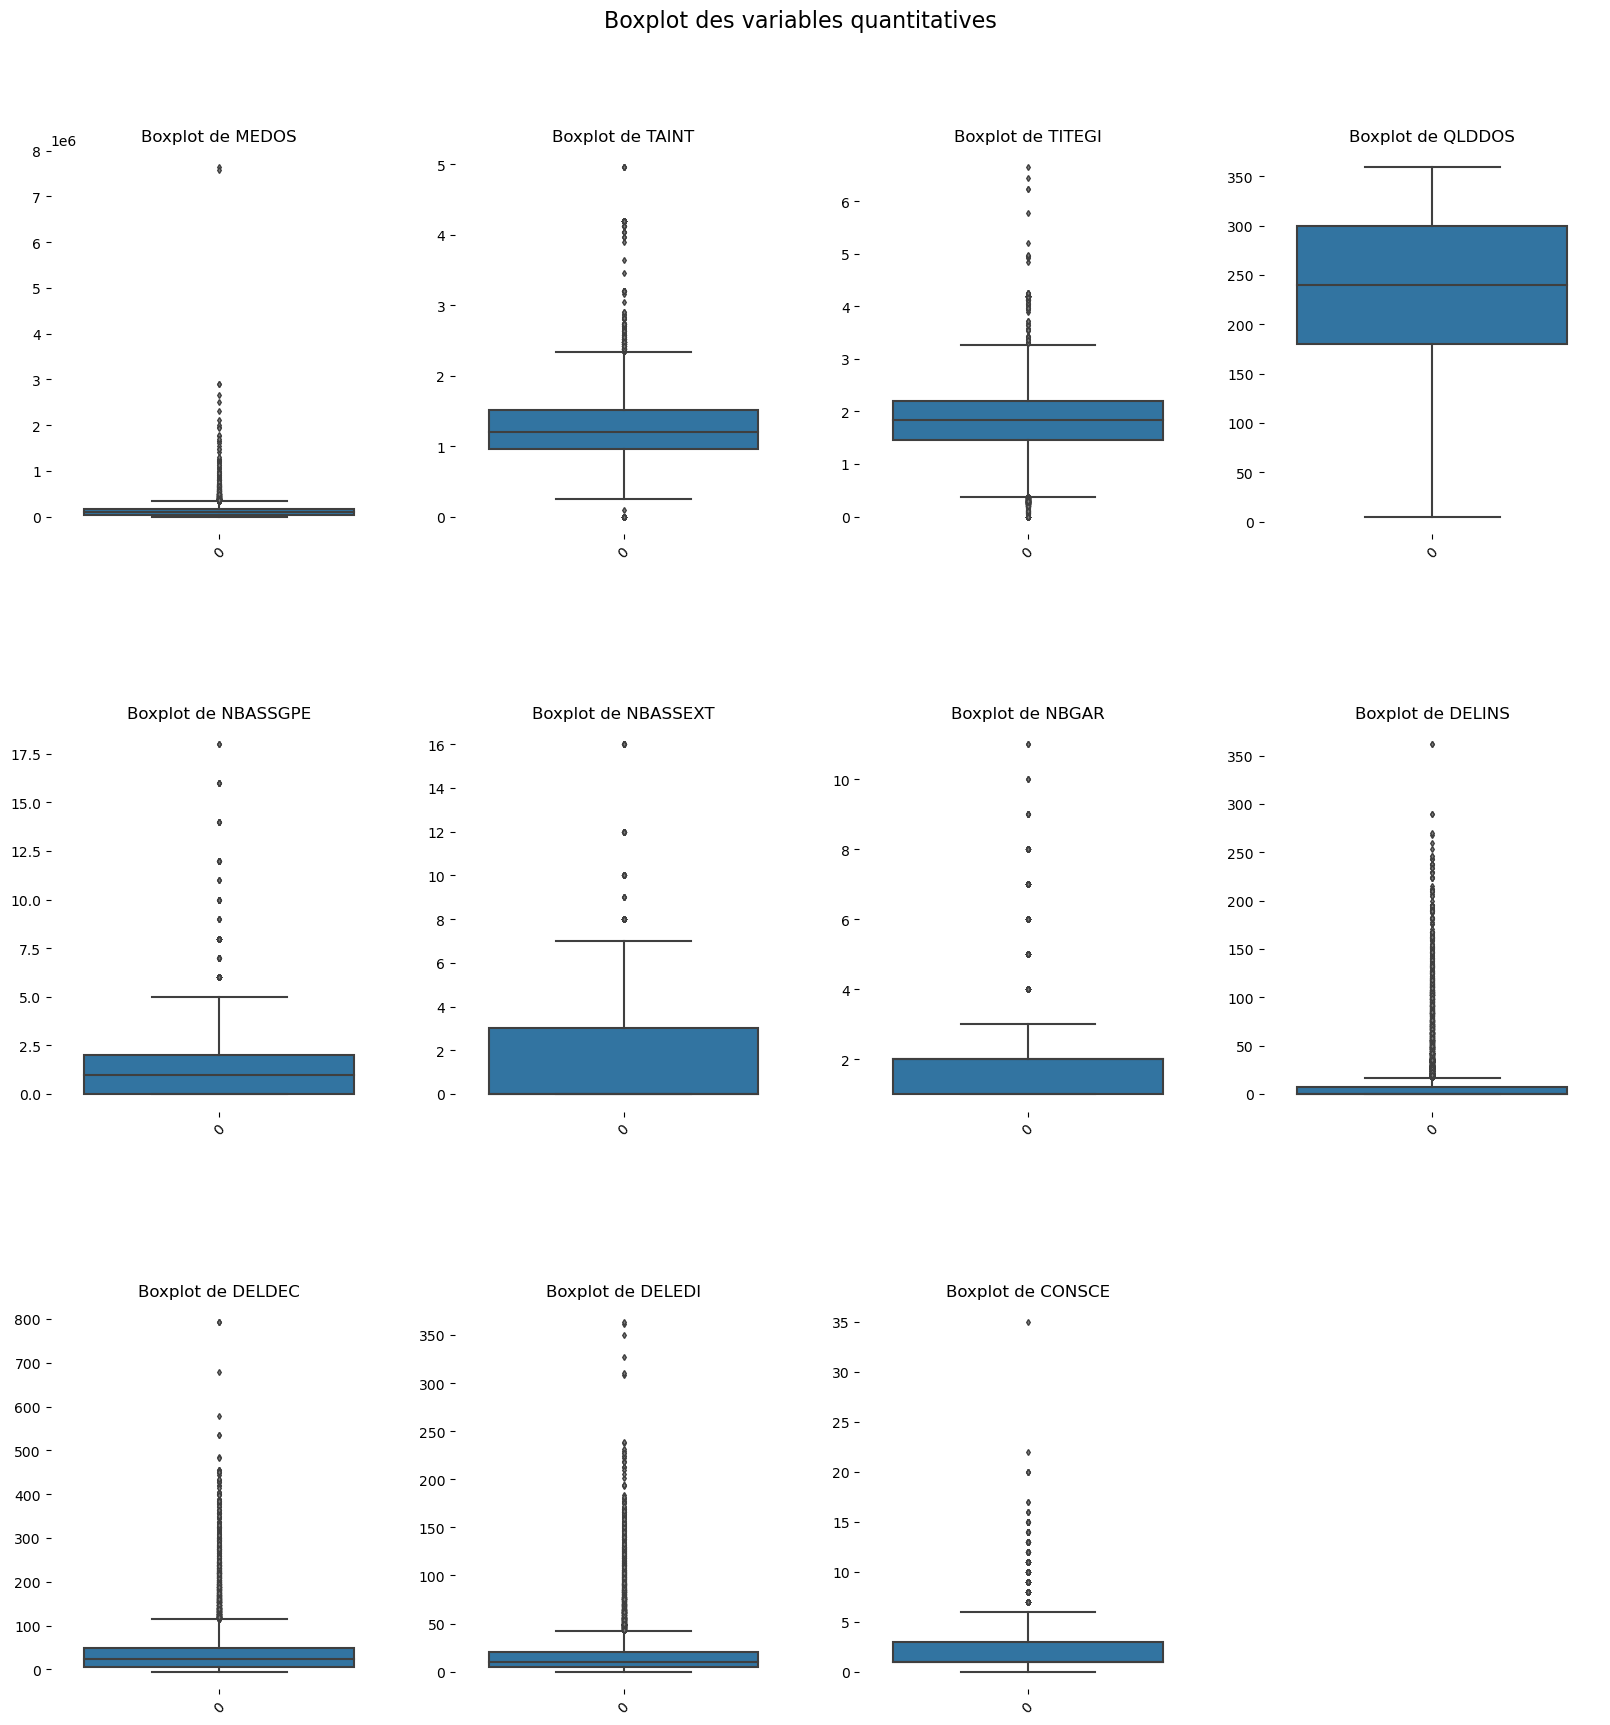

In [48]:
# Boxplots de toutes les variables quantitatives
# --------------------------------------------------
dv.plot_hist_box(credits,VAR_QUANTI_CREDIT,type_plot='box',layout=[3,4])

*=> appliquer des transformations sur les données pour les rendre + gaussiennes ?*

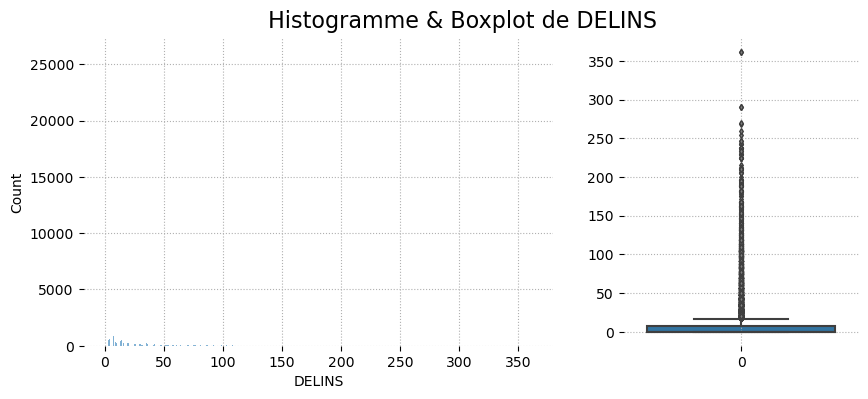

In [49]:
# Permet de regarder un histogramme & Boxplot en particulier
# --------------------------------------------------
dv.plot_1_hist_box(credits,'DELINS')

### Pairplots

In [50]:
# Pairplots pour les variables quantitatives
# -----------------------------------
#dv.plot_pairs(credits,VAR_QUANTI_CREDIT,fig_size=[20,20],save_path=PATH_PLOTS,save_name="credit_pairs_quanti")

**Observations**: 

- On avec graphique, on voit que peu de variables sont corrélées. Les seulves variables qui semblent corrélées entre elles sont: `TAINT`(Taux intérê) et `TITEGI` (TEG Initial prêt) ainsi que `NBASSGPE` (Nbre Assurance Groupe) et `NBASSEXT` (Nbre Assurance Externe)

### Corrélations 

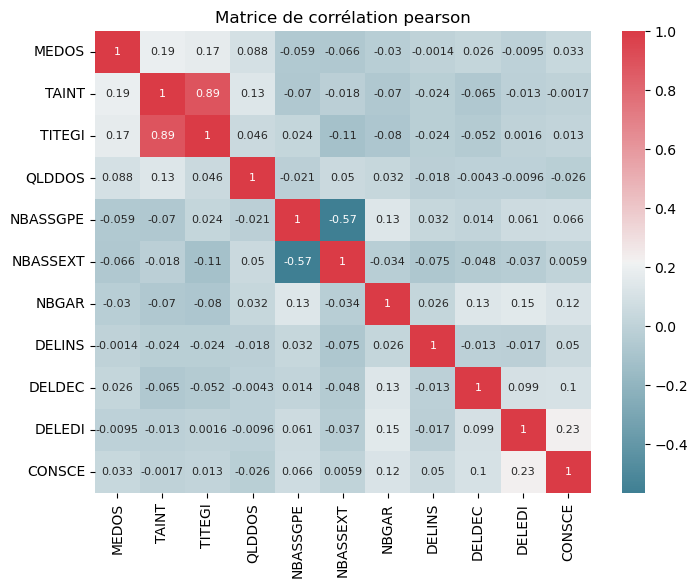

In [51]:
dv.plot_corr(credits,VAR_QUANTI_CREDIT,'pearson',fig_size=[8,6],
          save_path=PATH_PLOTS,save_name="credit_correlation_quanti_pearson")

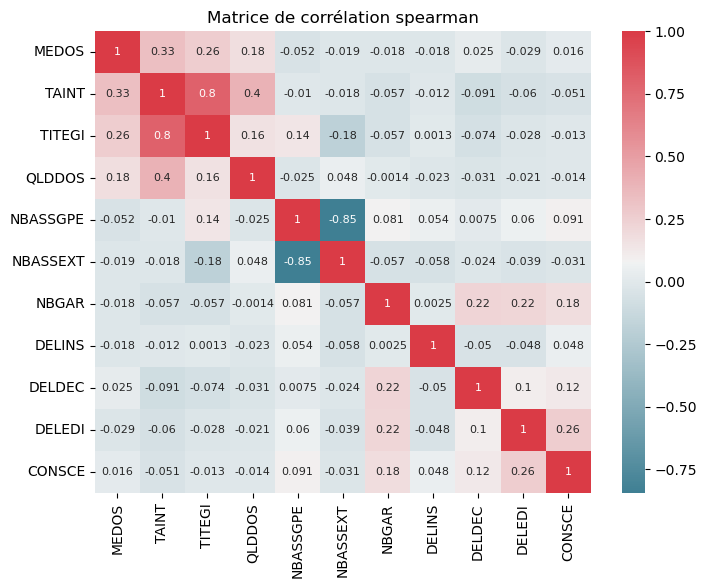

In [52]:
dv.plot_corr(credits,VAR_QUANTI_CREDIT,'spearman',fig_size=[8,6],
          save_path=PATH_PLOTS,save_name="credit_correlation_quanti_spearman")

**Observations** :\
Avec **`Pearson`** (mesure relations linéaires): 

- De la même daçon qu'avec le pairplot, on observe que  `TAINT`(Taux intérêt) et `TITEGI` (TEG Initial prêt) sont corrélées positivement à 86% ce qui suggère une relation linéaire entre ces 2 variables. En effet `TITEGI` est le taux d'intérêt comme  `TAINT` mais qui prend en compte la totalité des frais occasionnés.

- De même, `NBASSGPE` (Nbre Assurance Groupe) et `NBASSEXT` (Nbre Assurance Externe) sont corrélées négativement à -54% ce qui semble logique car un client possède soit `NBASSGPE` soit `NBASSEXT`. 

Avec **`Spearman`** (aucun apriori sur la distribution des variables), on observe les mêmes éléments que ci-dessus avec en plus:

- On voit que `MEDOS` (Montant nominal du dossier) est corrélée avec `TAINT` (Taux intérêt) à 26%, `TITEGI` à 18%, et `QLDDOS` à 17%

- `QLDDOS` (durée du prêt) est corrélé avec `TAINT` à 42%

-  `NBGAR` (Nbre de garanties) est corrélé avec `DELDEC` (Nbre jrs Décision) à 30%, `DELEDI` à 20% (Nbre Jrs Edition) et `CONSCE` (Nbre de scénarios) à 25%.

- `DELEDI`(Nbre Jrs Edition) est corrélé avec `CONSCE` (Nbre de scénarios) à 49%.


*=> une corrélation en dessous de 50% est-elle significative?*

## Variables qualitatives 

### Variables manquantes 

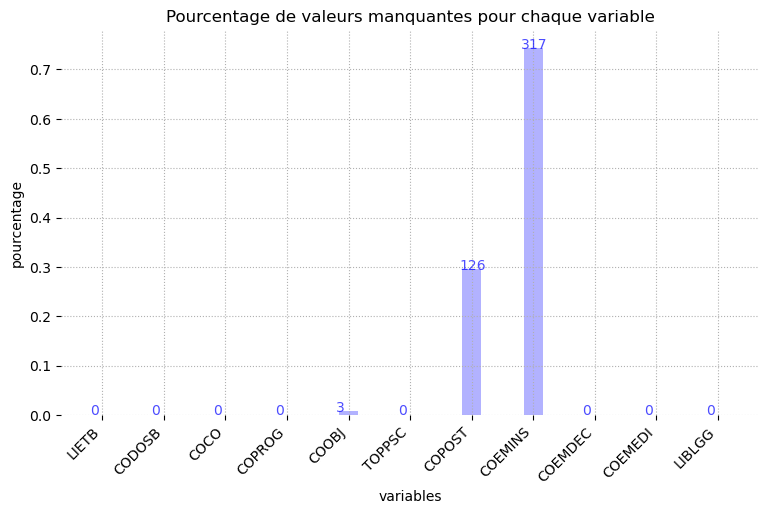

In [53]:
dv.plot_na_null(credits,VAR_QUALI_CREDIT,fig_size=[9,5],plot_null=False)

**Observations**: 
- Les valeurs manquantes sont au nombre de 0.5% pour `COPOST` (code postal du bien financé) et 0.7% pour `COEMINS` (Identifiant employé instruction).
- Il y a moinds de 0.1% de valeurs manquantes pour `COEMEDI`(Identifiant employé édition) et `COOBJ` (Code objet prêt). On pourrait emputer par la valeur la plus commune.   

=> *Peut-on imputer COPOST par un autre moyen ?</font>*

### Modalités

Nombre de modalités pour chaque variable:
-----------------------------------------
LIETB possède 1 modalités
CODOSB possède 26211 modalités
COCO possède 42659 modalités
COPROG possède 9 modalités
COOBJ possède 16 modalités
TOPPSC possède 2 modalités
COPOST possède 1523 modalités
COEMINS possède 1546 modalités
COEMDEC possède 1179 modalités
COEMEDI possède 53 modalités
LIBLGG possède 2 modalités


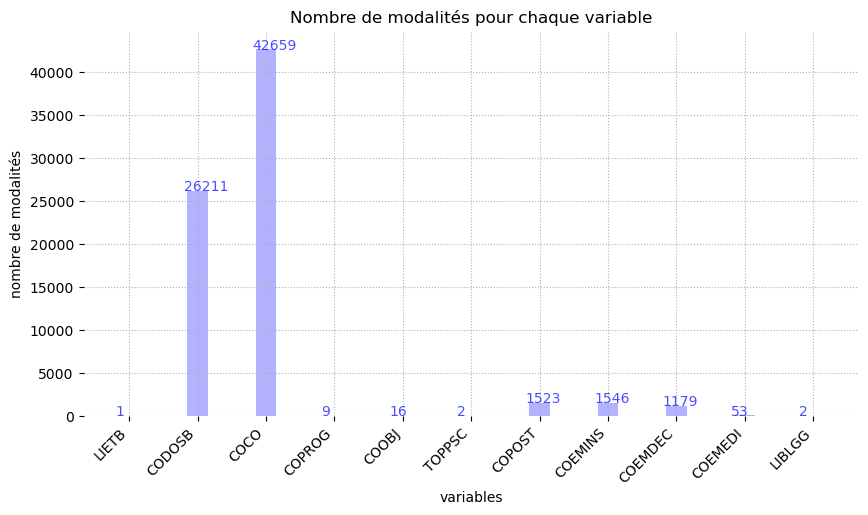

In [54]:
# Affichage du nombre de modalités des variables qualitatives
# --------------------------------------
dv.print_levels(credits,VAR_QUALI_CREDIT,fig_size=[10,5],verbose=True)

**Observations:** 
- On voit que seules les variables `LIETB`, `COPROG`, `COOBJ` et `TOPPSC` possèdent moins de 1000 modalités. 
- Il est normal que les autres varibles possèdent beaucoup de modalités. Il s'agit de : 
    * `COCO`: Identifiant contrat 
    * `CODOSB`: Identifiant dossier bancaire
    * `COPOST`: Code postal du bien financé
    * `COEMINS`,`COEMDEC`,`COEMEDI` : Identifiant employé instruction, décision et édition

### Barplots

In [55]:
# Mettre les variables qualitatives au format categorical. 
# --------------------------------------
credits_cat = dpg.to_Categorical(credits,VAR_QUALI_CREDIT)

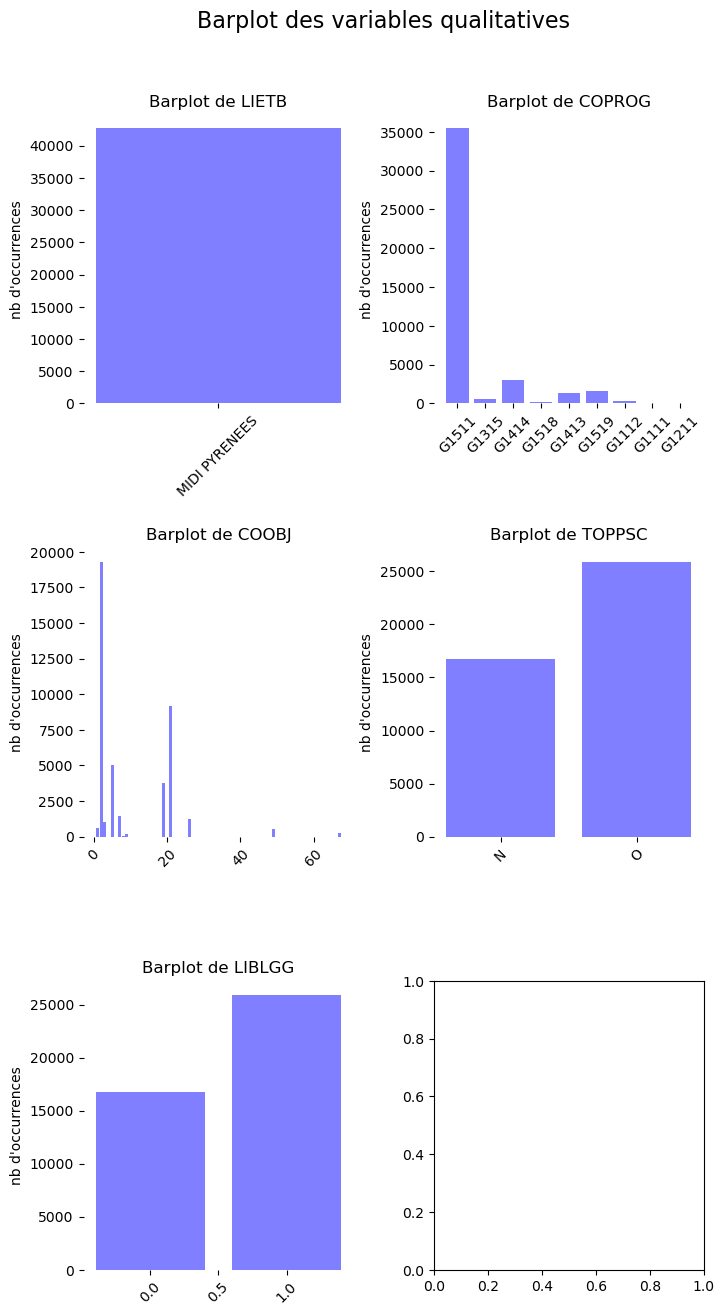

In [56]:
dv.plot_bar(credits_cat,VAR_QUALI_CREDIT_S,layout=[3,2],fig_size=[8,15])
#plot_bar(credits_cat,['COPROG', 'COOBJ', 'TOPPSC', 'LIBLGG'],layout=[1,4],fig_size=[20,5])

### Corrélations

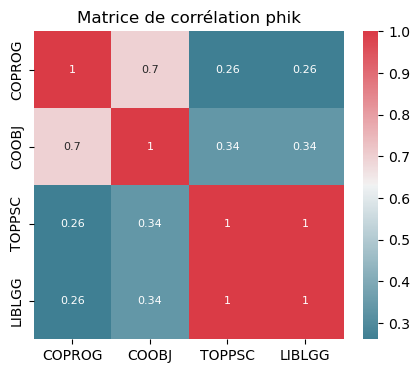

In [57]:
# Corrélation variables qualitatives avec peu de modalités uniquement
# -----------------------------------------------
dv.plot_corr(credits_cat, ['COPROG', 'COOBJ', 'TOPPSC','LIBLGG'],'phik',fig_size=[5,4],
          save_path=PATH_PLOTS,save_name="credit_correlation_quali_phik")

### Boxplots quantitative~qualitative

44 variables


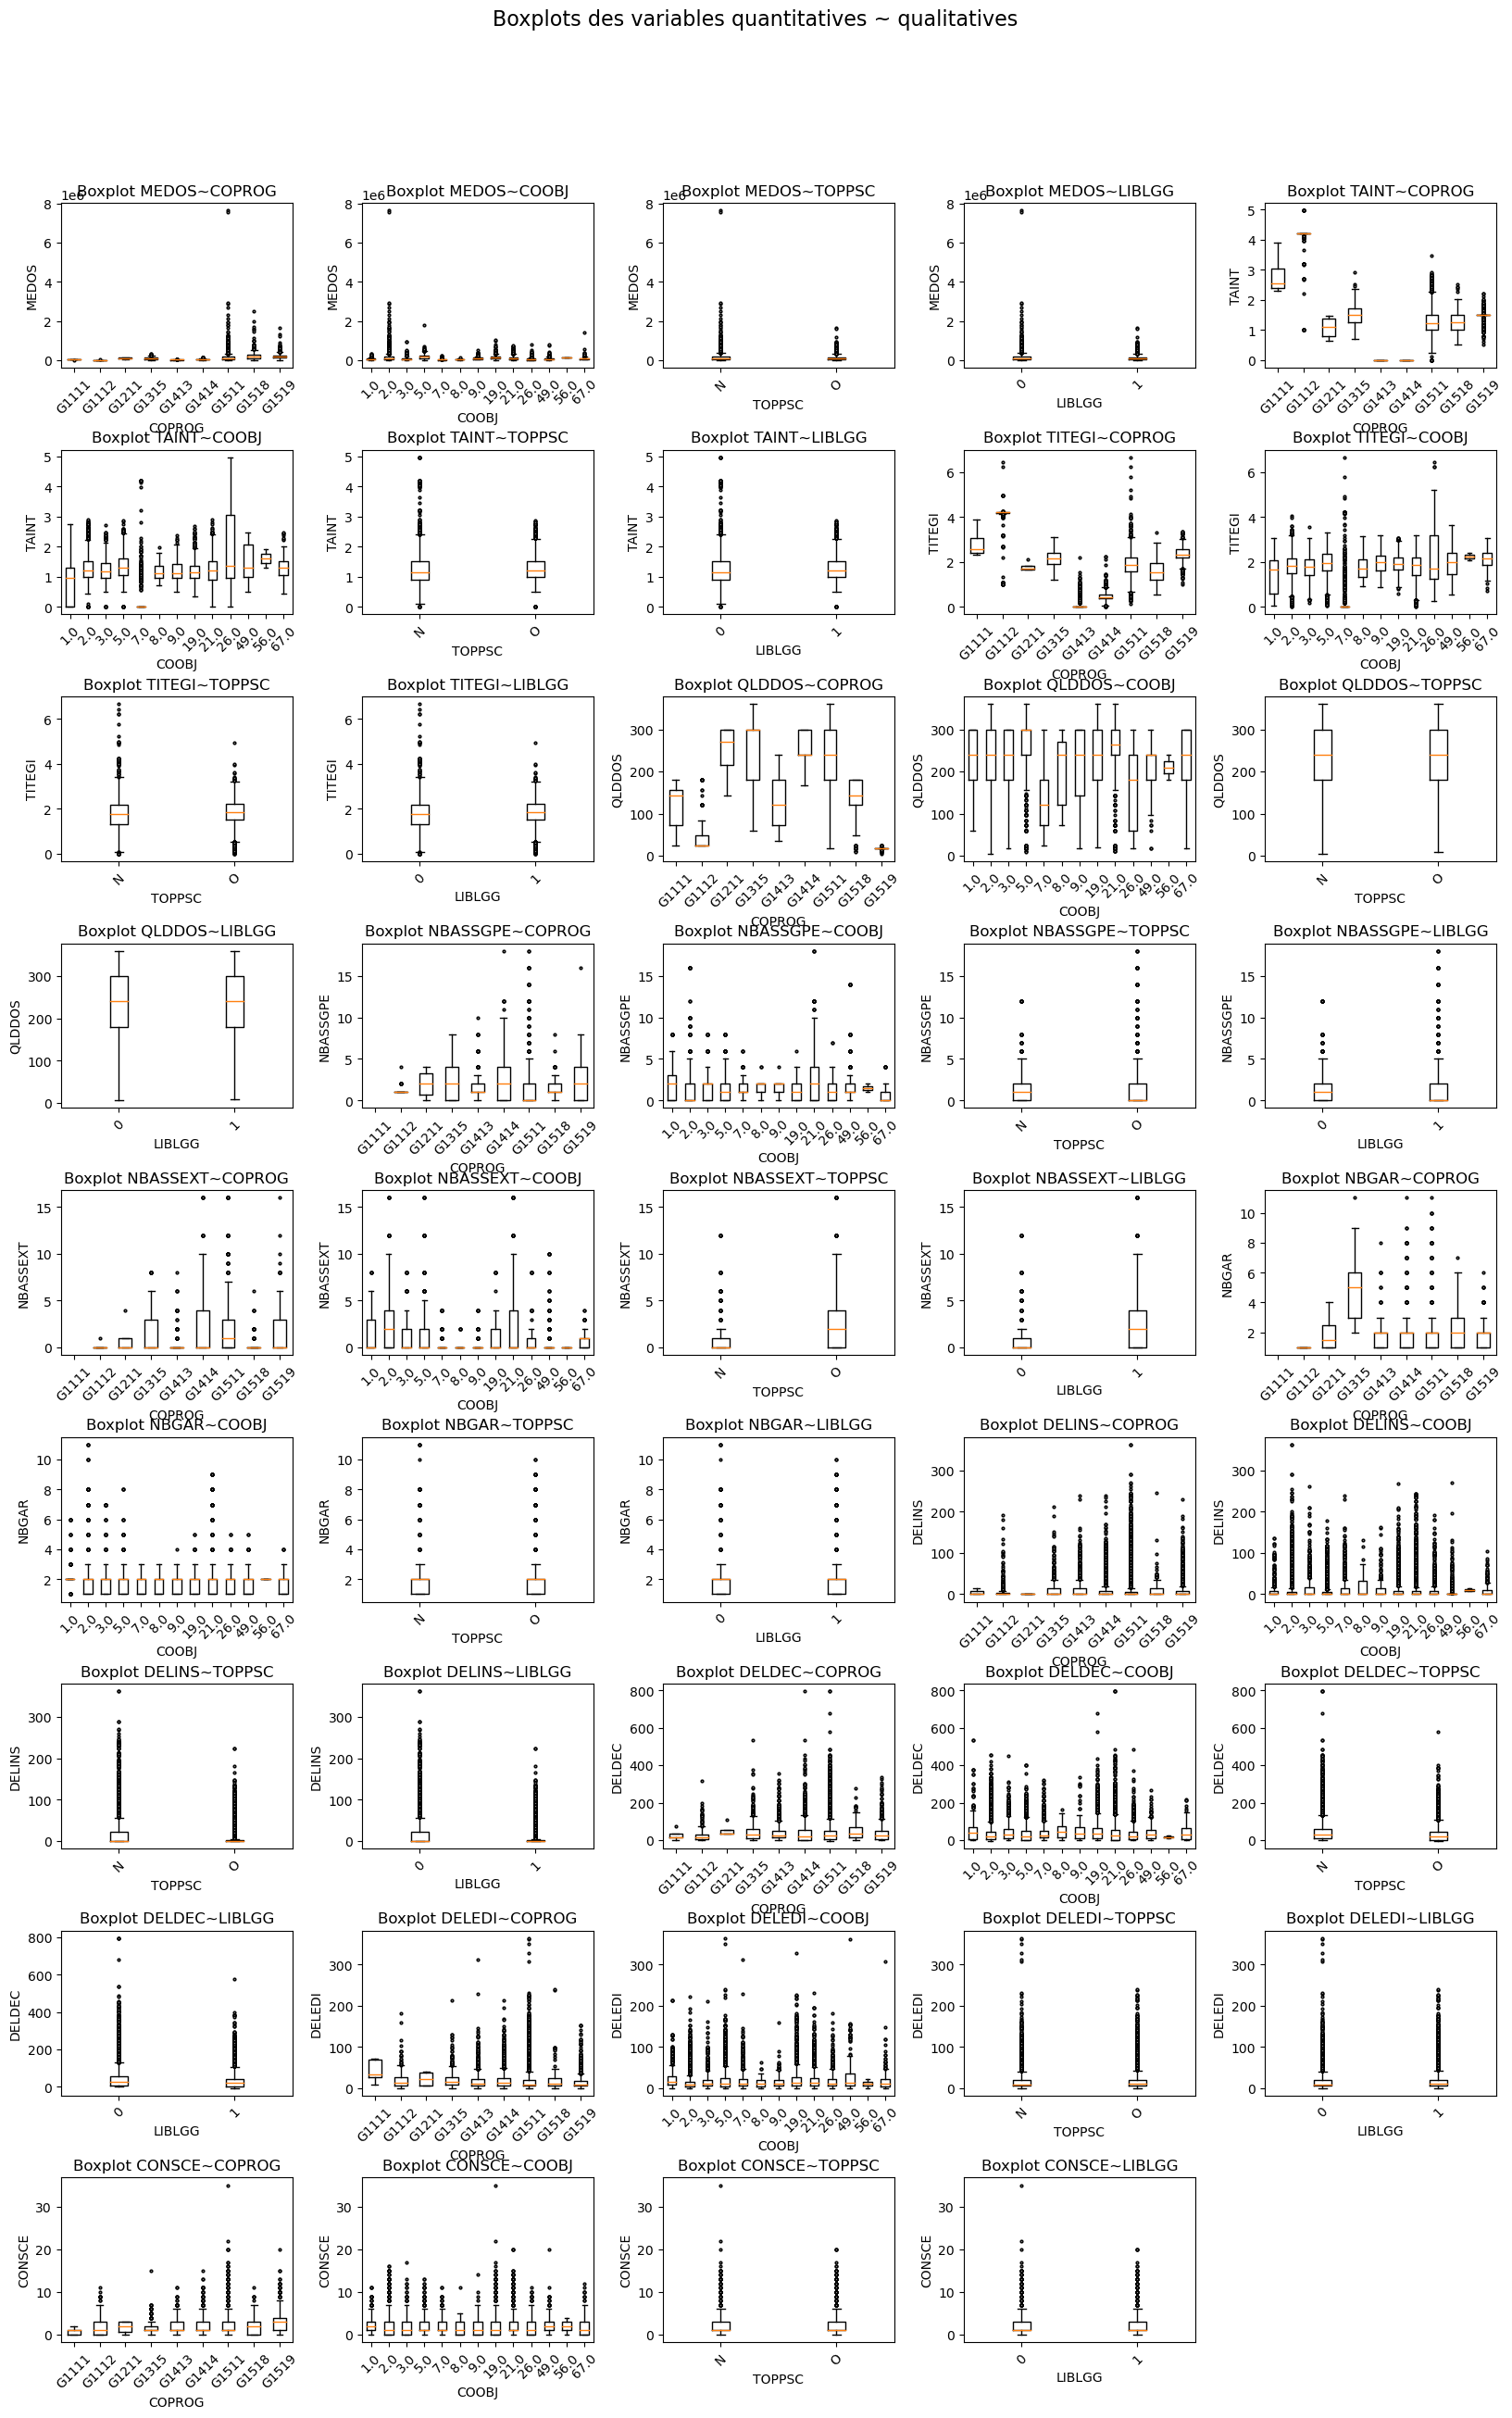

In [58]:
# Corrélations entre les variables qualitatives avec peu de modalités & toutes les variables quantitatives 
# -----------------------------------------------
dv.plot_box_cat_num(credits_cat,VAR_QUANTI_CREDIT,['COPROG', 'COOBJ', 'TOPPSC','LIBLGG'],fig_size=[20,30],layout=[9,5])

**Observations:**  On voit les variables suivantes semblent êytre corrélées:

- `TAINT`(Taux intérêt)-`COPROG`(Id produit groupe), `TITEGI`-`COPROG`(Id produit groupe) & un peu `TAINT`(Taux intérêt)-`COOBJ`(Code objet prêt)
- `QLDDOS`(Durée du prêt)-`COPROG`(Id produit groupe) & `QLDDOS`(Durée du prêt)-`COOBJ`(Code objet prêt)
- `NBASSGPE`(Nb Assurance Groupe)-`COPROG`(Id produit groupe) & `NBASSGPE`(Nb Assurance Groupe)-`COOBJ`(Code objet prêt)
- `NBASSEXT`(Nb Assurance Externe)-`COPROG`(Id produit groupe) & `NBASSEXT`(Nb Assurance Externe)-`COOBJ`(Code objet prêt)
- `NBGAR`(Nbre de garanties)-`COPROG`(Id produit groupe)

## Variables dates 

- `DATEDI`: Date edition à traiter
- `DTEDI`: Date édition traitée	

- `DDDOSP`: Date instruction à traiter
- `DTINS`: Date instruction traitée

- `DATDEC`: Date accord banque à traiter	
- `DTDEC`: Date accord banque traitée	

### Valeurs manquantes 

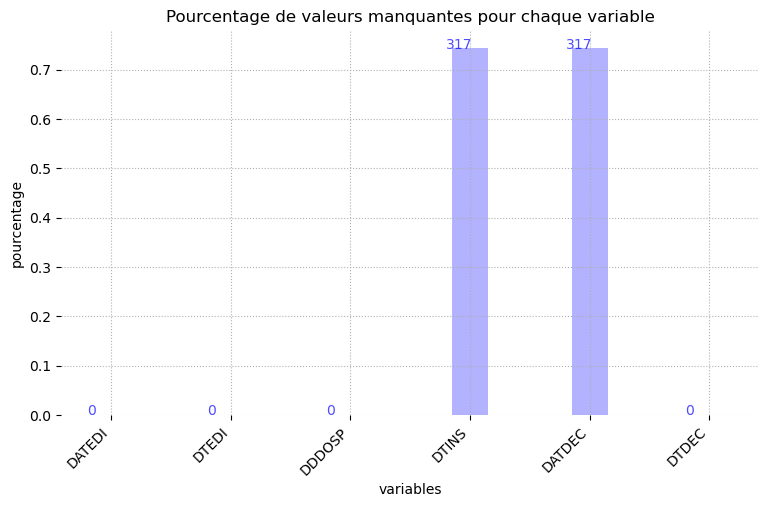

In [59]:
# Calcul des données manquantes 
# -------------------------------------------
dv.plot_na_null(credits,VAR_DATE_CREDIT,fig_size=[9,5],plot_null=False)

In [60]:
# Calcul du nombre de valeurs manquantes pour les variables 'DTINS','DATDEC','DTEDI'
# -------------------------------------------
var_na = ['DTINS','DATDEC','DTEDI'] 
idx_na_list = [] # listes des indices des valeurs nulles pour les vaeriables de var_na

#---- calcul du nb de valeurs manquantes
for i in range(len(var_na)):
    idx_na_list.append(list(np.where(credits[var_na[i]].isna())[0]))
    print("Il y a {} valeurs manquantes dans {}".format(len(idx_na_list[i]),var_na[i]))

#---- calcul du nb de valeurs manquantes en commun
n_common = len((set(idx_na_list[0]).intersection(idx_na_list[1]))) #nb de valeurs en commun entre 2 variables 
print("\nIl y a  {} valeurs manquantes en commun entre DTINS et DATDEC".format(n_common))
n_common = len((set(idx_na_list[2]).intersection(idx_na_list[1]))) #nb de valeurs en commun entre 2 variables 
print("Il y a  {} valeurs manquantes en commun entre DATDEC et DTEDI".format(n_common))

Il y a 317 valeurs manquantes dans DTINS
Il y a 317 valeurs manquantes dans DATDEC
Il y a 0 valeurs manquantes dans DTEDI

Il y a  317 valeurs manquantes en commun entre DTINS et DATDEC
Il y a  0 valeurs manquantes en commun entre DATDEC et DTEDI


**Observation:** Il y a peu de variables manquantes pour les variables dates: seulement 0.7% pour les variables `DTINS` et `DATDEC` et quasiment 0%  pour `DTEDI`. On voit également que si une valeur manque pour `DTINS` elle manque aussi pour `DATDEC`. 

### Pré-traitement & interpolation

In [61]:
# Transformation des dates au format datetime
# -------------------------------------------
credits = dpg.type_date(credits,VAR_DATE_CREDIT)

# Interpolation des valeurs manquantes des variables dates
# -------------------------------------------
credits = dpg.interpolate_date(credits,VAR_DATE_CREDIT)

# Trier le dataframe par dates croissantes
# -------------------------------------------
credits = dpg.sort_by_date(credits)

In [62]:
# Calcul du nombre de variables telles que credits['DATEDI']-credits['DTINS'] < 0
# ----------------------------------------
delta = credits['DATEDI']-credits['DTINS']
delta = delta.apply(lambda x: x.total_seconds()) #transformation en float
n_neg_delta = len(np.where(delta < 0)[0]) #nb de variables qui ont un delta < 0
print("Il y a {} variables telles que DATEDI-DTINS < 0".format(n_neg_delta))

Il y a 163 variables telles que DATEDI-DTINS < 0


### Corrélations

In [63]:
# Pour calculer la matrice de corrélation avec les dates,
# il faut les transformer au format float
# -----------------------------------------------
credits_fl = credits.copy() #credits_fl=credits où les dates sont en floats
credits_fl = dpg.df_datetime_to_float(credits_fl,VAR_DATE_CREDIT)

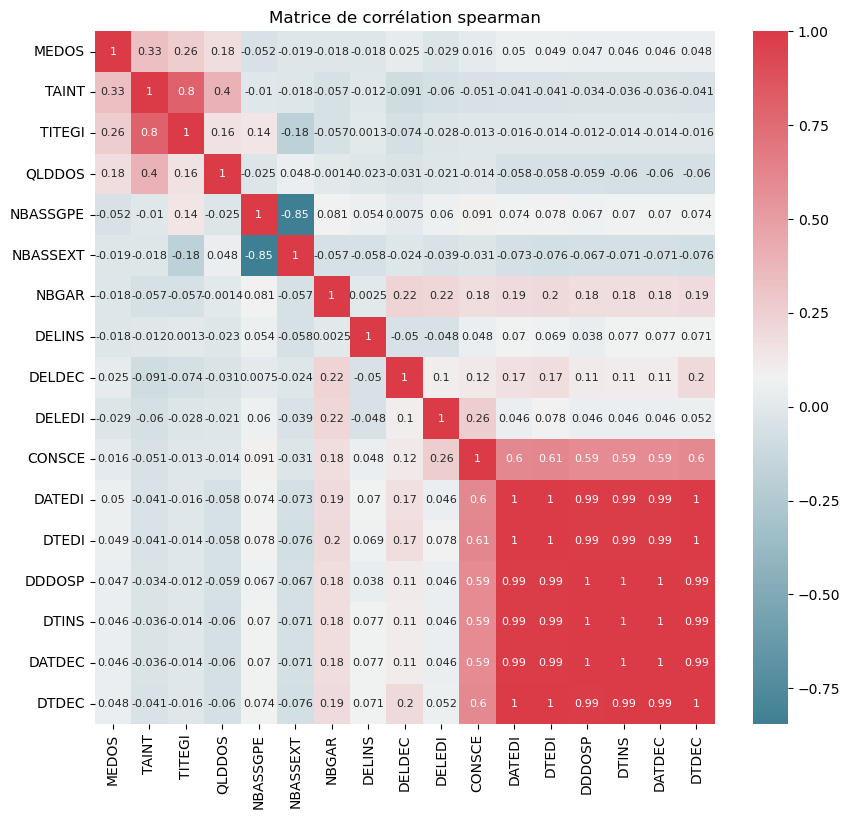

In [64]:
# Corrélartion variables dates et variables quantitatives spearman
# -----------------------------------------------
dv.plot_corr(credits_fl, VAR_QUANTI_CREDIT + VAR_DATE_CREDIT ,'spearman',fig_size=[10,9],
          save_path=PATH_PLOTS,save_name="credit_correlation_quanti&date_spearman")

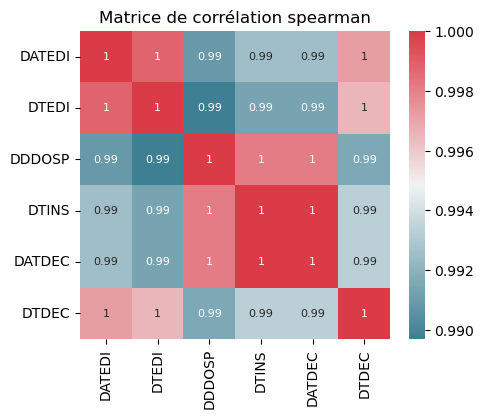

In [65]:
# Corrélation variables dates uniquement
# -----------------------------------------------
dv.plot_corr(credits_fl, VAR_DATE_CREDIT,'spearman',fig_size=[5,4],
          save_path=PATH_PLOTS,save_name="credit_correlation_dates_spearman")

**Observations :** Nous observons que :

- Les variables des dates sont toutes corrélées entre elles.
- `DTEDI` (et les autres dates) est corrélée avec `CONSCE` (Nbre de scénarios) à 45%, `DELDEC` (Nbre jrs Décision) à 30% et `NBGAR` (Nbre de garanties) à 26%. 

## Variables réponses 

### Ajout des variables réponses

In [66]:
# Ajout du délai d'édition d'un crédit
# -----------------------------------------------
credits = dpg.compute_DELAI(credits)

# Ajout nombre de crédits par jour
# -----------------------------------------------
credits = dpg.compute_NB_DOSS_DAY(credits)

### Corrélations 

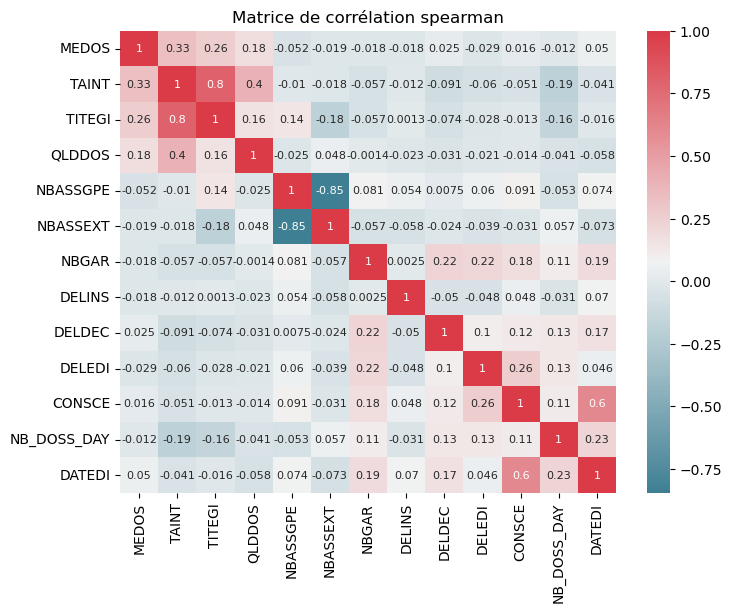

In [67]:
# Pour calculer la matrice de corrélation avec les dates,
# il faut les transformer au format float
# -----------------------------------------------
credits_fl = credits.copy() #credits_fl=credits où les dates sont en floats
credits_fl = dpg.df_datetime_to_float(credits_fl,VAR_DATE_CREDIT)

# Corrélation variables dates + variables quantitatives + variables réponses spearman
# -----------------------------------------------
dv.plot_corr(credits_fl, VAR_QUANTI_CREDIT + ['NB_DOSS_DAY','DATEDI'],'spearman',fig_size=[8,6],
          save_path=PATH_PLOTS,save_name="credit_correlation_quanti&reponses&dates_spearman")

interval columns not set, guessing: ['MEDOS', 'TAINT', 'TITEGI', 'QLDDOS', 'NBASSGPE', 'NBASSEXT', 'NBGAR', 'DELINS', 'DELDEC', 'DELEDI', 'CONSCE', 'DATEDI', 'NB_DOSS_DAY']


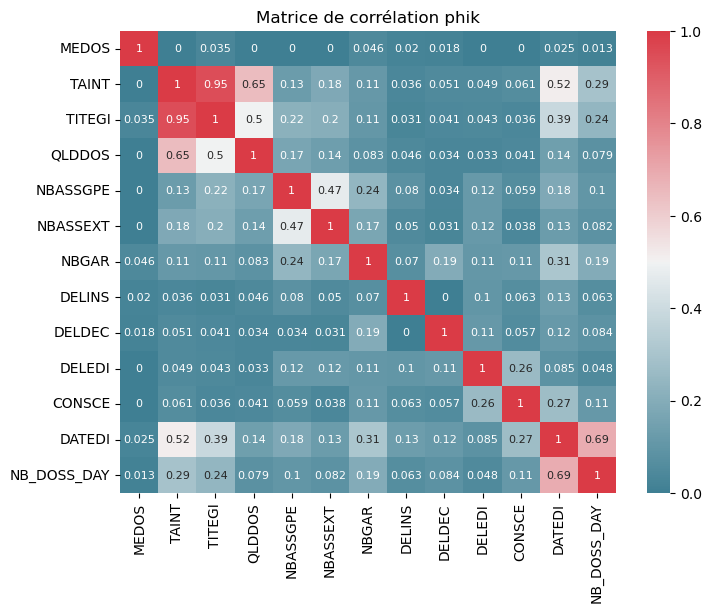

In [68]:
# Corrélartion variables dates + variables quantitatives + variables réponses phik
# -----------------------------------------------
dv.plot_corr(credits_fl, VAR_QUANTI_CREDIT + ['DATEDI','NB_DOSS_DAY'],'phik',fig_size=[8,6],
          save_path=PATH_PLOTS,save_name="credit_correlation_quanti&reponses_phik")

**Observations :** Nous observons que :

- Seul le taux d'intérêt `TAINT` semble être corrélé  à `DATEDI` avec la corrélation `phik`.

8 variables


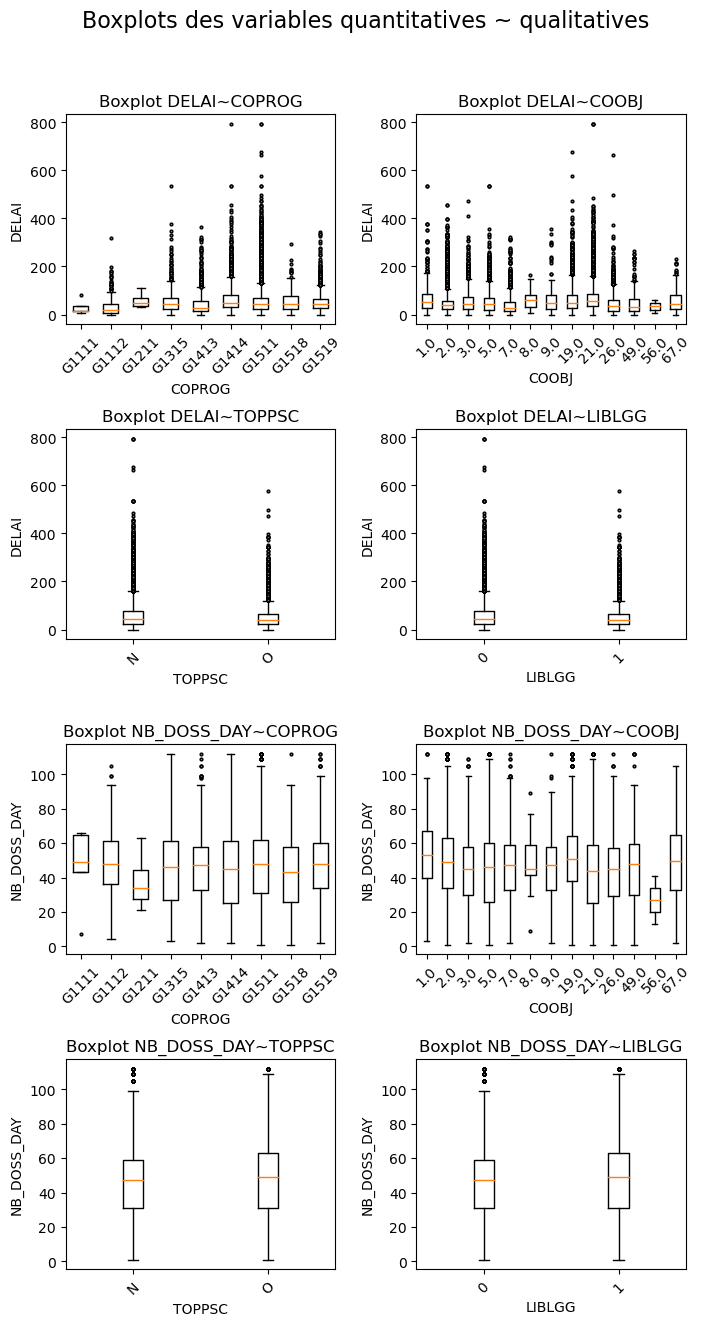

In [74]:
# Mettre à nouveau les variables qualitatives au format categorical. 
# car on a ajouté les variables réponses
# --------------------------------------
credits_cat = dpg.to_Categorical(credits,VAR_QUALI_CREDIT)

# Corrélations entre les variables qualitatives avec peu de modalités & les variabes réponses 
# -----------------------------------------------
dv.plot_box_cat_num(credits_cat,['DELAI','NB_DOSS_DAY'],['COPROG', 'COOBJ', 'TOPPSC','LIBLGG'],fig_size=[8,15],layout=[4,2])
#plot_box_cat_num(credits_cat,['NB_DOSS_DAY'],['COPROG', 'COOBJ', 'TOPPSC','LIBLGG'],fig_size=[15,4],layout=[1,4])

4 variables


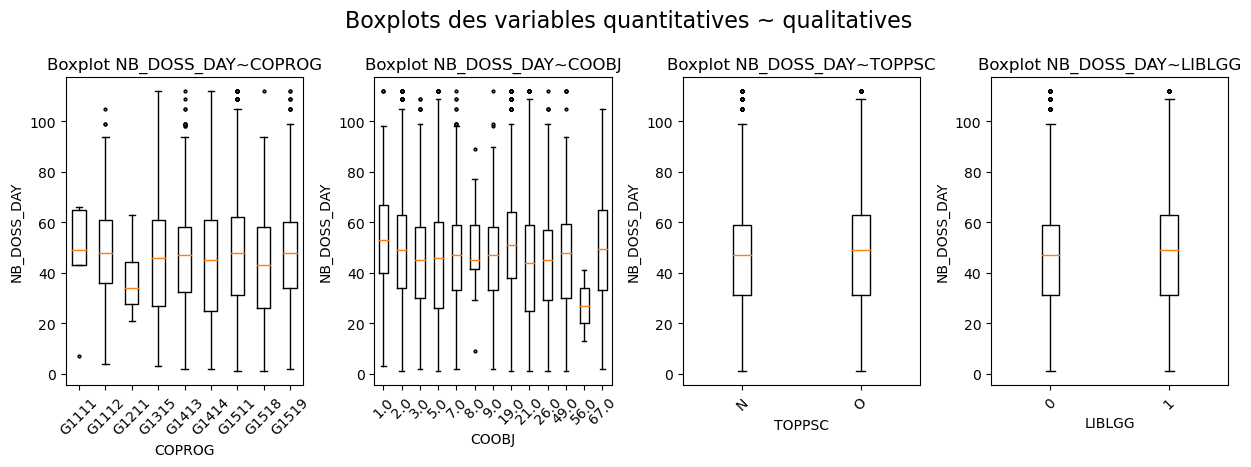

interval columns not set, guessing: ['NB_DOSS_DAY']


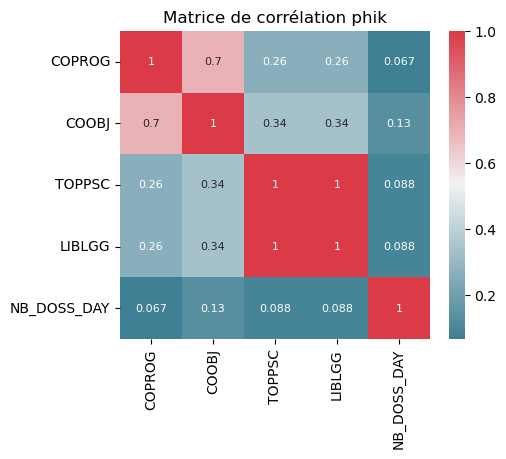

In [70]:
# Corrélation variables qualitatives avec peu de modalités + variable réponse
# -----------------------------------------------
dv.plot_corr(credits_cat, ['COPROG', 'COOBJ', 'TOPPSC','LIBLGG'] + ['NB_DOSS_DAY'],'phik',fig_size=[5,4],
          save_path=PATH_PLOTS,save_name="credit_correlation_quali_phik")

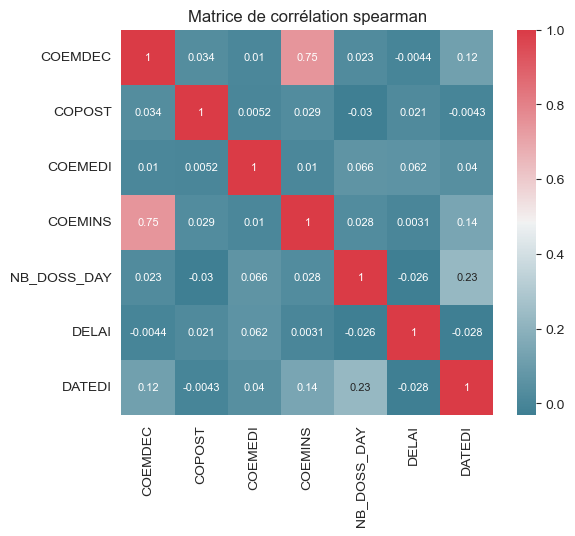

In [34]:
# Comme on ne peut pas regarder les corrélations entre les variables qualitatives avec beaucoup de modalités 
# & les variables quantitatives avec des boxplots comme ci-dessus, on calcule la matrice des corrélations
# et on traite les variables qualitatives avec beaucoup de modalités qui sont des entiers comme des variables quantitatives.
# -----------------------------------------------
dv.plot_corr(credits_fl, ['COEMDEC', 'COPOST', 'COCO', 'COEMEDI', 'COEMINS'] + ['NB_DOSS_DAY','DELAI'] + ['DATEDI'],'spearman',fig_size=[6,5],
          save_path=PATH_PLOTS,save_name="credit_correlation_quanli&reponses&dates_spearman")

## Sélection de Variables

### Task 1

Une fois l'analyse exploratoire effectuée, nous pouvons sélectionner les variables que nous souhaitons conserver pour le problème intitulé <font color = 'red'> **task1** </font> c'est-à-dire pour prédire la variable réponse `NB_DOSS_DAY` qui est le nombre de dossiers qui arrivent au backOffice par jour ou par semaine. 

- Les variables qualitatives ayant beaucoup de modalités sont: `COEMDEC`,`COEMEDI`, `COEMINS` (Identifiant employé décision, édition, instruction), `COPOST` (code postal), `COCO` (Identifiant contrat) et `CODOSB` (Identifiat dossier bancaire). \
D'après les graphes ci-dessus, on voit que ces variables ne sont pas très corrélées avec les variables à expliquer (`DELAI`,`NB_DOSS_DAY`). Comme les variables qualitatives doivent être encodées et que le nombre de modalités pose problème pour l'encodage, je pense ne pas considérer ces variables pour la suite. 

- On observe aussi que les variables dates `DATEDI`, `DTEDI`, `DDDOSP`, `DTINS`, `DATDEC`, `DTDEC` sont toutes fortement corrélées entre elles (corrélation > 0.99). On ne peut donc conserver que `DATEDI` pour l'étude.  

- On peut supprimer la variable `LIETB`est constate et sera utile uniquement lorsque les données BPS seront présentes. On peut donc pour le moment supprimer cette variable.

Ainsi, les variables sélectionnées pour <font color = 'red'> **task1** </font> sont présentées ci-dessous :

In [90]:
# Importation des packages contenant les variables sélectionnées 
# -----------------------------------------------
import data_prep_task1 as dp1 

In [91]:
# Affichage des variables sélectionnées pour la task1
# -----------------------------------------------
print("Affichage des variables sélectionnées pour la task1")
print("VAR_REP_1 :", VAR_REP_1)
print("VAR_DATE_CREDIT_1 :", VAR_DATE_CREDIT_1)
print("VAR_QUANTI_CREDIT_1 :", VAR_QUANTI_CREDIT_1)
print("VAR_QUALI_CREDIT_1 :", VAR_QUALI_CREDIT_1)

Affichage des variables sélectionnées pour la task1
VAR_REP_1 : ['NB_DOSS_DAY']
VAR_DATE_CREDIT_1 : ['DATEDI']
VAR_QUANTI_CREDIT_1 : ['MEDOS', 'TAINT', 'TITEGI', 'QLDDOS', 'NBASSGPE', 'NBASSEXT', 'NBGAR', 'DELINS', 'DELDEC', 'DELEDI', 'CONSCE']
VAR_QUALI_CREDIT_1 : ['COPROG', 'COOBJ', 'TOPPSC', 'LIBLGG']
